# Autoencoder applied to a convolutional setting

## Import Libraries

In [1]:
import numpy as np
import keras
from keras.layers import MaxPooling2D, UpSampling2D
from keras.layers import Convolution2D, Input
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\brend\anaconda3\envs\LHC\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\brend\anaconda3\envs\LHC\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\brend\anaconda3\envs\LHC\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\brend\anaconda3\envs\LHC\lib\site-packages\t

## Load Dataset

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = np.reshape(x_train, (len(x_train), 28,28,1))
x_test = np.reshape(x_test, (len(x_test), 28,28,1))

## Define the Convolutional Autoencoder Model

In [6]:
input = Input(shape=(28,28,1), name = 'input') # input layer
# Encoder
x = Convolution2D(16, kernel_size = (3,3), padding = 'same', activation = 'relu', name = 'conv_1')(input)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
x = Convolution2D(8, kernel_size = (3,3), padding = 'same', activation = 'relu', name = 'conv_2')(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
x = Convolution2D(8, kernel_size = (3,3), padding = 'same', activation = 'relu', name = 'conv_3')(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
# Decoder
x = Convolution2D(8, kernel_size = (3,3), padding = 'same', activation = 'relu', name = 'conv_4')(x)
x = UpSampling2D(size = (2,2))(x)
x = Convolution2D(8, kernel_size = (3,3), padding = 'same', activation = 'relu', name = 'conv_5')(x)
x = UpSampling2D(size = (2,2))(x)
x = Convolution2D(8, kernel_size = (3,3), activation = 'relu', name = 'conv_6')(x)
x = UpSampling2D(size = (2,2))(x)
# Output layer
output = Convolution2D(filters=1, kernel_size=(3,3), padding = 'same', activation = 'sigmoid', name = 'output')(x)

model = Model(inputs=input, output = output, name = 'CAE')
model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

model.summary()

Model: "CAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0       

C:\Users\brend\anaconda3\envs\LHC\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., name="CAE", outputs=Tensor("ou...)`


## Fit the data

In [7]:
model.fit(x_train, x_train, batch_size=32, epochs = 50)


Epoch 1/50
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1638
Epoch 2/50
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1250
Epoch 3/50
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1171
Epoch 4/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1130
Epoch 5/50
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1100
Epoch 6/50
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1083
Epoch 7/50
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1062
Epoch 8/50
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1051
Epoch 9/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1041
Epoch 10/50
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1033
Epoch 11/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1025
Epoch 12/50
60000/60000 [==========================

## Prediction on new data

In [8]:
out_images = model.predict(x_test)

## Plot the generated data

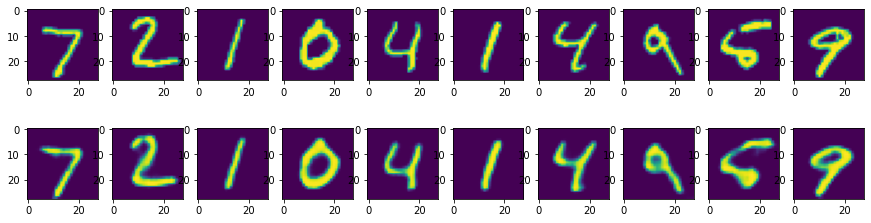

In [9]:
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(out_images[i].reshape(28,28))

plt.show()